### import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## read dataset

In [2]:
df=pd.read_csv("./adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## description dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


## data processing

#### استخراج ویژگی‌های عددی

In [6]:
numeric_features = df.select_dtypes(include=[np.number])
print(numeric_features.columns)

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


####  نکته : ویژگی های عددی مقادیر خالی ندارند

### استخراج ویژگی‌های اسمی و شمارش مقادیر خالی در هر ویژگی اسمی

In [7]:
categorical_features = df.select_dtypes(include=['object'])
print(categorical_features.isnull().sum())


workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
native-country    0
income            0
dtype: int64


### Substitute the value of NaN in place of the question mark values

In [8]:
df.replace('?',np.nan,inplace=True)
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [9]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

### Three features have values of none

In [10]:
null_cols=['workclass','occupation','native-country']

### handle nulls values with mode

In [11]:
#function to handle nulls in categorical columns by its class mode
def handle_null(df,cols):
    for col in cols:
        df[col] = df.groupby("income")[col].transform(lambda x: x.fillna(x.mode()[0]))
    return df

In [12]:
df=handle_null(df,null_cols)
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### drop duplicated records

In [13]:
df=df.drop_duplicates() 

### Data normalization using z-score

In [14]:
from sklearn import preprocessing
# Create a subset DataFrame with only the numeric features
numeric_cols=df.select_dtypes(include=[np.number]).columns
# Apply z-score normalization using StandardScaler
std=preprocessing.StandardScaler()
df[numeric_cols] = std.fit_transform(df[numeric_cols])

### Visualize correlation between columns

<Axes: >

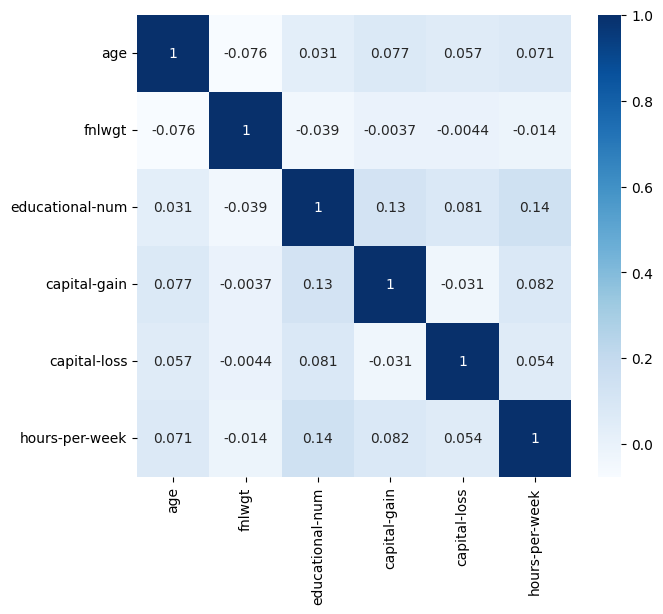

In [15]:
plt.figure(figsize=(7,6))
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr_matrix,annot=True,cmap='Blues')

### Find the pairs of features that have a correlation coefficient greater than 0.8 and remove features

In [16]:
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# Create a boolean mask of the upper triangle of the correlation matrix
mask = np.triu(np.ones(corr_matrix.shape, dtype=bool))

# Set the diagonal elements of the mask to False
np.fill_diagonal(mask, False)

# Find the pairs of features that have a correlation coefficient greater than 0.8
high_corr = corr_matrix[mask].abs() > 0.8

# Get the indices of the highly correlated features
features_to_remove = [column for column in high_corr.columns if any(high_corr[column])]
print("features to remove:", features_to_remove)

# Remove the highly correlated features from the dataset
adult_df = df.drop(columns=features_to_remove)


features to remove: ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss']


### show Remaining features

In [17]:
adult_df.head()

,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,-0.034367,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.772558,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,-0.034367,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,-0.034367,United-States,>50K
4,Private,Some-college,Never-married,Adm-clerical,Own-child,White,Female,-0.841291,United-States,<=50K


### convert categorical data to numerical

In [18]:
def handle_catg(df):
    cat_cols=df.select_dtypes(include=[object]).columns
    #convert column catagories to nums
    for col in cat_cols:
        df[col]=df[col].astype(str)
        col_vals=df[col].unique()
        if len(col_vals)==2:
            i=0
            for label in col_vals:
                df[col].replace(label,i,inplace=True)
                i+=1
    df=pd.get_dummies(df
               ,columns =df.select_dtypes(include=[object]).columns 
               ,drop_first = True
               )
    return df

In [19]:
df=handle_catg(df)
df.head(5)

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-0.995929,0.351583,-1.197969,0,-0.144884,-0.217251,-0.034367,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,-0.047609,-0.945440,-0.419771,0,-0.144884,-0.217251,0.772558,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,-0.777086,1.394491,0.747525,0,-0.144884,-0.217251,-0.034367,1,True,False,...,False,False,False,False,False,False,False,True,False,False
3,0.390077,-0.277850,-0.030672,0,0.886245,-0.217251,-0.034367,1,False,False,...,False,False,False,False,False,False,False,True,False,False
4,-1.506563,-0.815887,-0.030672,1,-0.144884,-0.217251,-0.841291,0,False,False,...,False,False,False,False,False,False,False,True,False,False


#### Visualize correlation between columns

<Axes: >

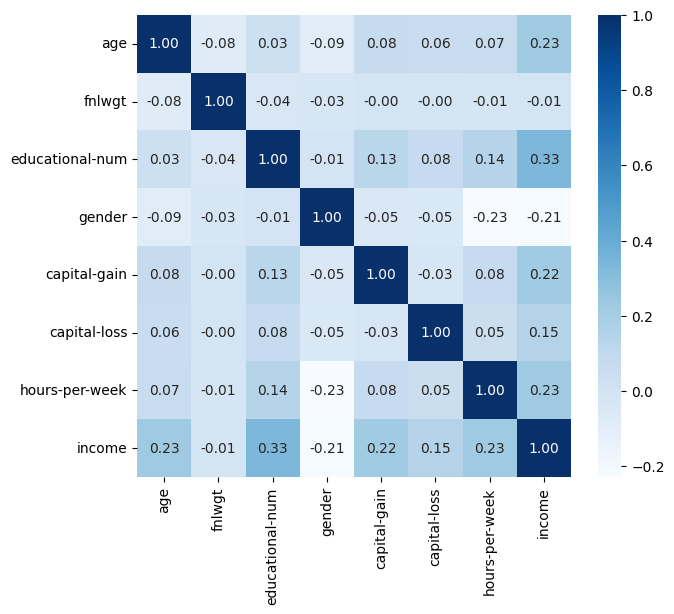

In [20]:
plt.figure(figsize=(7,6))
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr_matrix,annot=True,cmap='Blues', fmt=".2f")

### Find the pairs of features that have a correlation coefficient greater than 0.8 and remove features

In [21]:
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# Create a boolean mask of the upper triangle of the correlation matrix
mask = np.triu(np.ones(corr_matrix.shape, dtype=bool))

# Set the diagonal elements of the mask to False
np.fill_diagonal(mask, False)

# Find the pairs of features that have a correlation coefficient greater than 0.8
high_corr = corr_matrix[mask].abs() > 0.8

# Get the indices of the highly correlated features
features_to_remove = [column for column in high_corr.columns if any(high_corr[column])]

print("features to remove: ",features_to_remove)

# Remove the highly correlated features from the dataset
adult_df = df.drop(columns=features_to_remove)

features to remove:  ['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week']


### show Remaining features

In [22]:

adult_df.head()

,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,0,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


### تقسیم مقادیر ویژگی سن به 10 بین با عمق یکسان

In [224]:
df['age_bins'] = pd.cut(df['age'], bins=10, labels=False)

# نمایش 10 مقدار اولیه ویژگی سن تقسیم شده
print(df['age_bins'].head(10))

0    1
1    2
2    1
3    3
4    0
5    2
6    1
7    6
8    0
9    5
Name: age_bins, dtype: int64
